C:\Users\Administrator\AppData\Local\Temp\ipykernel_5244\984169733.py:40: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


APPLIED BLACK-SCHOLES OPTION PRICING
Stock Ticker: AAPL
Current Stock Price: $273.08
Strike Price: $273.0
Time to Maturity: 0.5 years
Estimated Volatility: 28.42%
--------------------------------------------------
Theoretical Call Price: $25.16
Theoretical Put Price:  $18.34


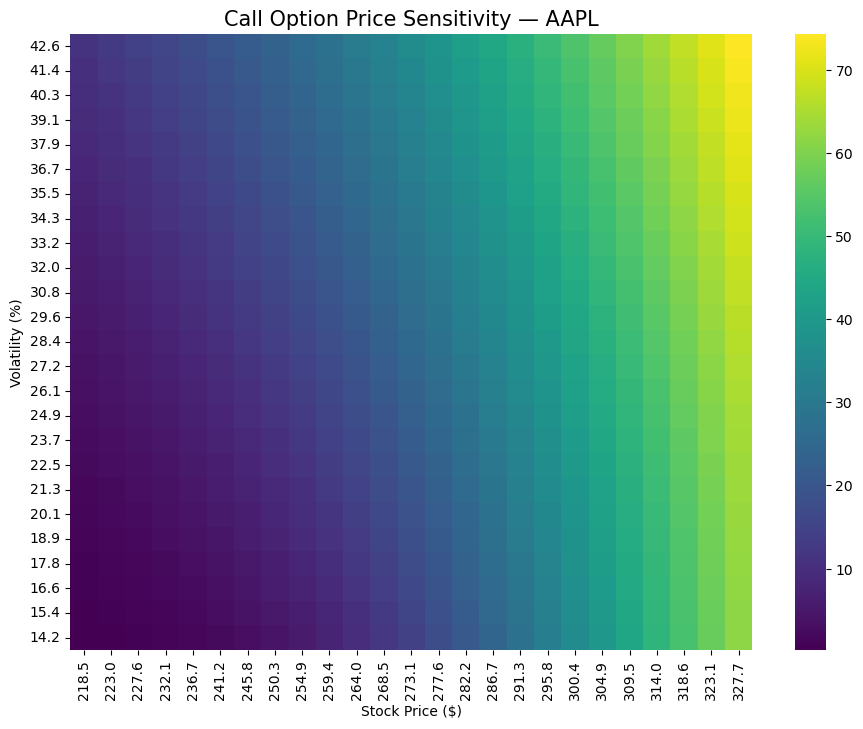

Heatmap saved as: applied_option_price_heatmap.png


In [2]:
# =========================================================
# PROJECT 06: APPLIED OPTION PRICING ON REAL MARKET DATA
# Author: Fares Awwad-Zeidan
# Concept: Applied Financial Engineering & Derivatives
# Objective: Price options using real stock prices and
#            estimated market volatility
# =========================================================

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from datetime import datetime, timedelta

# =========================================================
# 1. BLACK-SCHOLES MODEL
# =========================================================
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    return price

# =========================================================
# 2. FETCH REAL STOCK DATA
# =========================================================
ticker = "AAPL"   # You can change this to any stock
start_date = "2022-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(ticker, start=start_date, end=end_date)
close_prices = data['Close']

# Current stock price
S_current = close_prices.iloc[-1].iloc[0]  # Extract scalar value

# =========================================================
# 3. ESTIMATE REAL VOLATILITY
# =========================================================
log_returns = np.log(close_prices / close_prices.shift(1))
volatility_annual = log_returns.std() * np.sqrt(252)

# =========================================================
# 4. OPTION PARAMETERS
# =========================================================
K_strike = round(S_current, 0)     # At-the-money
T_time = 0.5                       # 6 months to maturity
r_rate = 0.05                      # 5% risk-free rate
sigma_vol = volatility_annual.iloc[0]  # Extract scalar value

# =========================================================
# 5. OPTION PRICING
# =========================================================
call_price = black_scholes(S_current, K_strike, T_time, r_rate, sigma_vol, 'call')
put_price = black_scholes(S_current, K_strike, T_time, r_rate, sigma_vol, 'put')

print("=" * 50)
print("APPLIED BLACK-SCHOLES OPTION PRICING")
print("=" * 50)
print(f"Stock Ticker: {ticker}")
print(f"Current Stock Price: ${S_current:.2f}")
print(f"Strike Price: ${K_strike}")
print(f"Time to Maturity: {T_time} years")
print(f"Estimated Volatility: {sigma_vol*100:.2f}%")
print("-" * 50)
print(f"Theoretical Call Price: ${call_price:.2f}")
print(f"Theoretical Put Price:  ${put_price:.2f}")
print("=" * 50)

# =========================================================
# 6. HEATMAP: PRICE SENSITIVITY (REAL DATA)
# =========================================================
stock_prices = np.linspace(S_current * 0.8, S_current * 1.2, 25)
volatilities = np.linspace(sigma_vol * 0.5, sigma_vol * 1.5, 25)

price_grid = np.zeros((len(volatilities), len(stock_prices)))

for i, vol in enumerate(volatilities):
    for j, s in enumerate(stock_prices):
        price_grid[i, j] = black_scholes(s, K_strike, T_time, r_rate, vol, 'call')

plt.figure(figsize=(11, 8))
sns.heatmap(
    price_grid,
    xticklabels=np.round(stock_prices, 1),
    yticklabels=np.round(volatilities * 100, 1),
    cmap="viridis"
)

plt.title(f"Call Option Price Sensitivity — {ticker}", fontsize=15)
plt.xlabel("Stock Price ($)")
plt.ylabel("Volatility (%)")
plt.gca().invert_yaxis()

plt.savefig("applied_option_price_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

print("Heatmap saved as: applied_option_price_heatmap.png")
